In [380]:
import numpy as np # linear algebra
from math import log
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from numpy import mean
from numpy import std
from termcolor import colored as cl 

In [385]:

df = pd.read_csv("CC.csv")
df.head(5)

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,2,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,3,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,4,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,5,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Check whether there are missing values in the dataset or not:
 Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64
Time variable
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Time_Hr, dtype: float64


Text(0, 0.5, '# transactions')

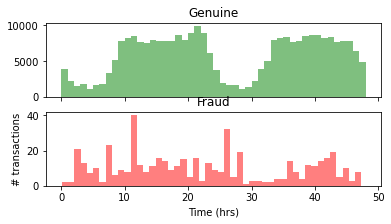

In [386]:
#Check for null values if any
print("Check whether there are missing values in the dataset or not:\n", df.isnull().sum())
#to check if there is any trend in time
print("Time variable")
df["Time_Hr"] = df["Time"]/3600 # convert to hours
print(df["Time_Hr"].tail(5))
fig, (ax1, ax2) = plt.subplots(2, 1, sharex = True, figsize=(6,3))
ax1.hist(df.Time_Hr[df.Class==0],bins=48,color='g',alpha=0.5)
ax1.set_title('Genuine')
ax2.hist(df.Time_Hr[df.Class==1],bins=48,color='r',alpha=0.5)
ax2.set_title('Fraud')
plt.xlabel('Time (hrs)')
plt.ylabel('# transactions')

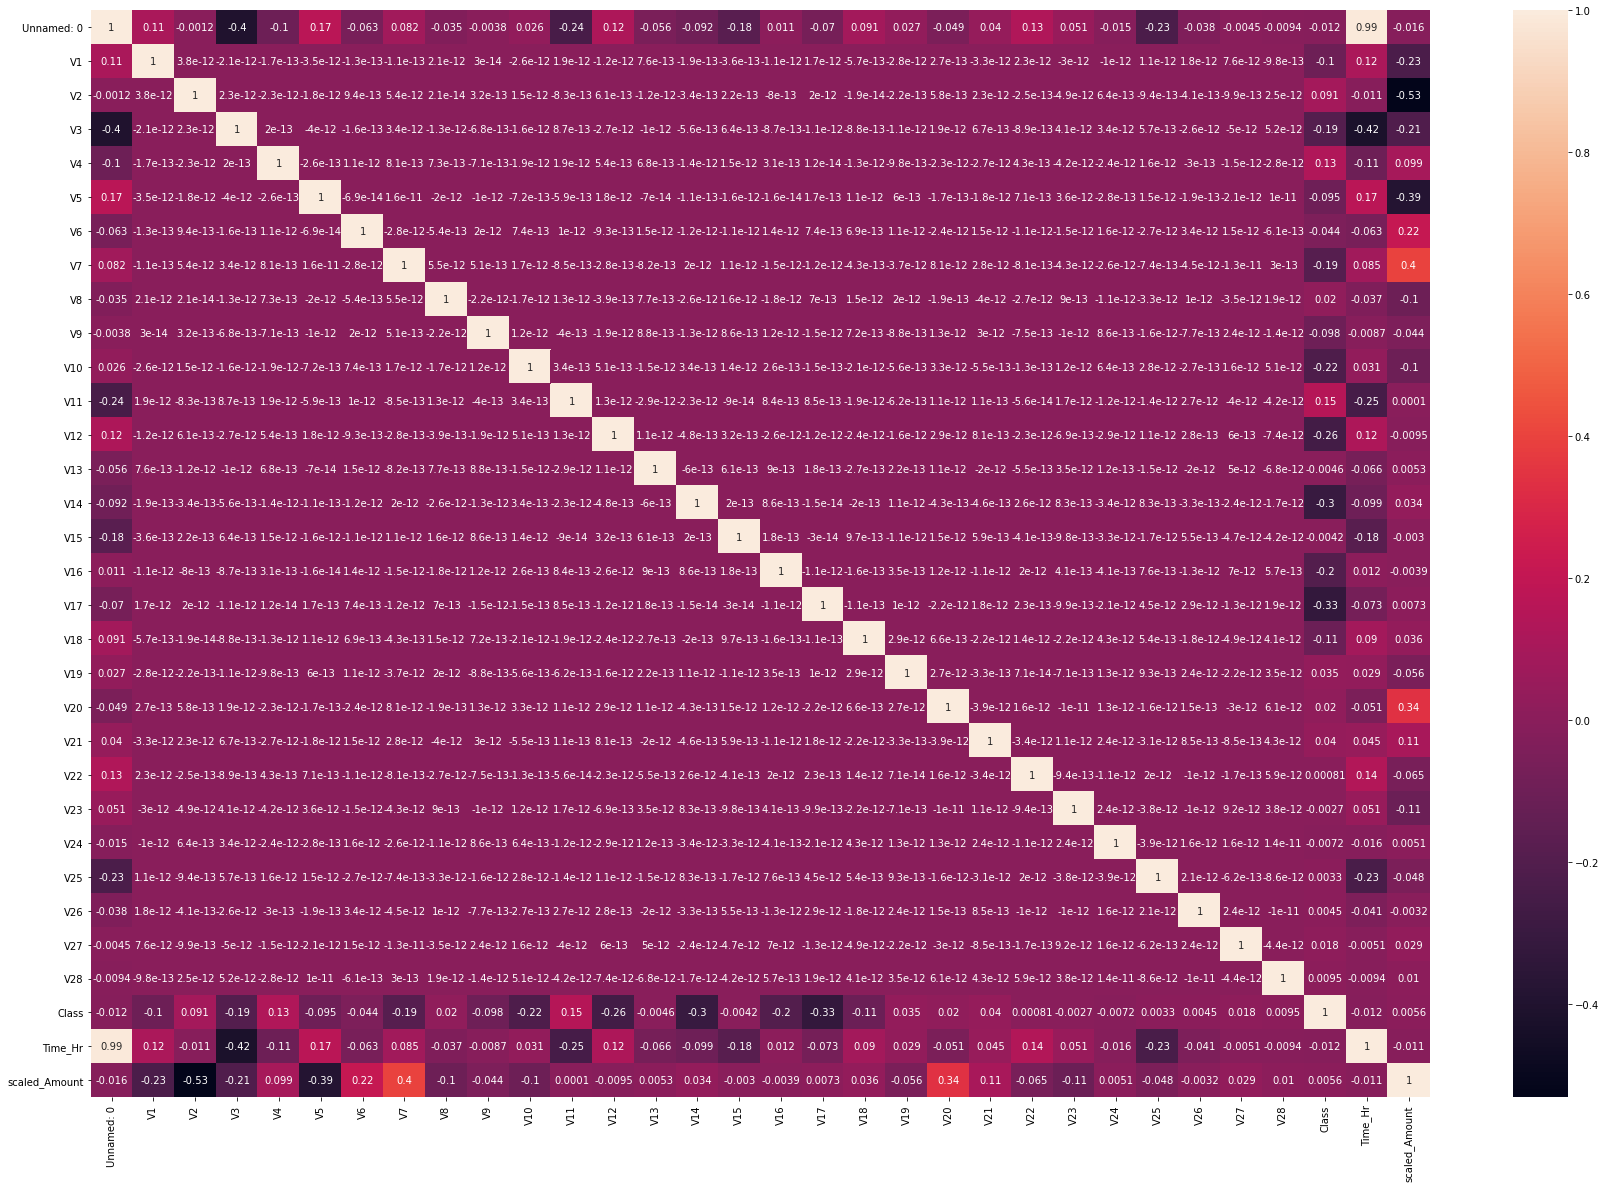

In [425]:
#Correlation
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), annot = True)
plt.title=("Correlation Matrix")
plt.show()

In [388]:
#for both the cases time dependence is same in genuine as well as fraud, will drop time and keep time in hours
df = df.drop(['Time'],axis=1)
df.head()

,Unnamed: 0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hr
0,1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.000000
1,2,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.000000
2,3,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.000278
3,4,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.000278
4,5,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.000556


Text(0, 0.5, '# transactions')

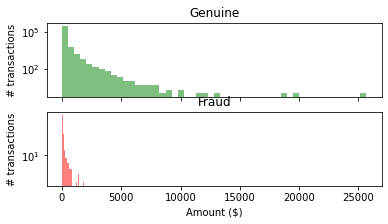

In [389]:
#let us check for Amount column
fig, (ax3,ax4) = plt.subplots(2,1, figsize = (6,3), sharex = True)
ax3.hist(df.Amount[df.Class==0],bins=50,color='g',alpha=0.5)
ax3.set_yscale('log') # to see the tails
ax3.set_title('Genuine') # to see the tails
ax3.set_ylabel('# transactions')
ax4.hist(df.Amount[df.Class==1],bins=50,color='r',alpha=0.5)
ax4.set_yscale('log') # to see the tails
ax4.set_title('Fraud') # to see the tails
ax4.set_xlabel('Amount ($)')
ax4.set_ylabel('# transactions')

In [390]:
#From above we see that the cases in fraud are less than 5k and amount >10k all fall in genuine
from sklearn.preprocessing import StandardScaler
df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df = df.drop(['Amount'],axis=1)

D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\sudha\python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

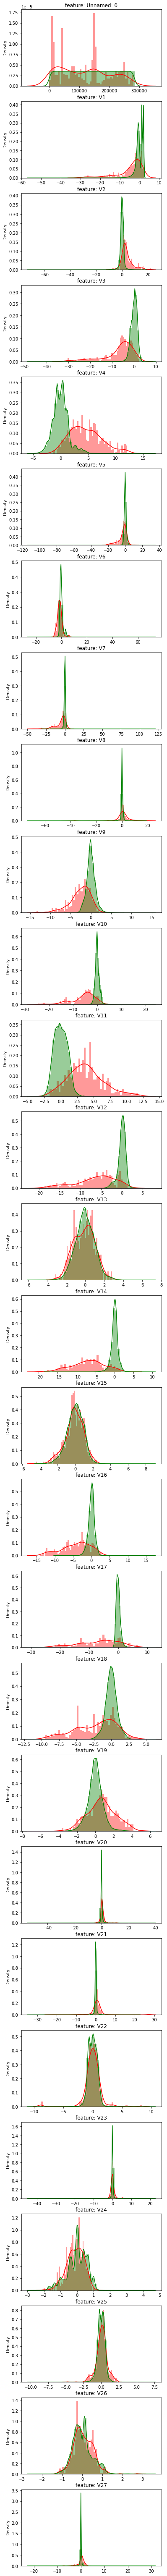

In [391]:
# Features V1, V2, ... V28 are the principal components obtained with PCA.
# Features V1, V2, ... V28 are the principal components obtained with PCA.
import seaborn as sns
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(28, 1)
plt.figure(figsize=(6,28*4))
for i, col in enumerate(df[df.iloc[:,0:28].columns]):
    ax5 = plt.subplot(gs[i])
    sns.distplot(df[col][df.Class == 1], bins=50, color='r')
    sns.distplot(df[col][df.Class == 0], bins=50, color='g')
    ax5.set_xlabel('')
    ax5.set_title('feature: ' + str(col))
plt.show()

In [392]:
#As from it can be seen that  features V1,V2 and so on have similar distribution for both fraud and genuine.

def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    #print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=10, stratify=y)

    print("train-set size: ", len(y_train),
      "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [393]:
def get_predictions(clf, X_train, y_train, X_test):
    # create classifier
    clf = clf
    # fit it to training data
    clf.fit(X_train,y_train)
    # predict using test data
    y_pred = clf.predict(X_test)
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = clf.predict_proba(X_test)
    #for fun: train-set predictions
    train_pred = clf.predict(X_train)
    return y_pred, y_pred_prob

In [394]:
def print_scores(y_test,y_pred,y_pred_prob): 
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))


In [395]:
print("Case-NB-1  do not drop anything")
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Case-NB-1  do not drop anything
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.4864864864864865
precision score:  0.2891566265060241
f1 score:  0.36272040302267006
accuracy score:  0.9970389616469459


In [396]:
print("Case 2 drop some of principle components that have similar distributions in above plots")
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Case 2 drop some of principle components that have similar distributions in above plots
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.5202702702702703
precision score:  0.3515981735159817
f1 score:  0.4196185286103542
accuracy score:  0.99750711000316


In [397]:
print("Case 3 -- Drop Time_Hr and principle components")
drop_list = ['Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Case 3 -- Drop Time_Hr and principle components
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.5202702702702703
precision score:  0.3515981735159817
f1 score:  0.4196185286103542
accuracy score:  0.99750711000316


In [398]:
print(cl(Fore.BLUE + "                NAIVYE BAYES THEOREM               ", attrs = ['bold']))
#print("Case-4 drop some of principle components + Time + 'scaled_Amount' ")
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

                NAIVYE BAYES THEOREM               
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.5202702702702703
precision score:  0.3515981735159817
f1 score:  0.4196185286103542
accuracy score:  0.99750711000316


In [416]:
print(cl(Fore.BLUE + "            DECISION TREE          ", attrs = ['bold']))
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
model = tree.DecisionTreeRegressor()
model.fit(X_train, y_train)
model.score(X_train, y_train)

y_pred = model.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

            DECISION TREE          
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.7094594594594594
precision score:  0.7094594594594594
f1 score:  0.7094594594594594
accuracy score:  0.9989934810341398


In [400]:
## Random Forest
print(cl(Fore.BLUE + "               RANDOM FOREST             ", attrs = ['bold']))
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf.score(X_train, y_train)

y_pred = rf.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

               RANDOM FOREST             
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.722972972972973
precision score:  0.8629032258064516
f1 score:  0.786764705882353
accuracy score:  0.9993211848834895


In [401]:
from colorama import Fore, Back, Style
print(cl(Fore.BLUE + "                  LOGISTIC REGRESSION        ", attrs = ['bold']))
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_train, y_train)

y_pred = lr.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

                  LOGISTIC REGRESSION        
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.7027027027027027
precision score:  0.7591240875912408
f1 score:  0.7298245614035089
accuracy score:  0.9990988144142879


In [402]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
model = GradientBoostingClassifier()
cv = RepeatedKFold(n_splits = 10, n_repeats = 3, random_state = 1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv = cv, n_jobs = -1, error_score = 'raise')
print('MAE: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
# fit the model on the whole dataset
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print("Accuracy Gradient", model.fit(X_train, y_train))

MAE: -0.001 (0.000)
Accuracy Gradient GradientBoostingClassifier()


In [403]:
print(cl(Fore.BLUE + "                  GRADIENT BOOSTER        ", attrs = ['bold']))
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_absolute_error
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

y_pred = gb.predict(X_test)
mean_absolute_error(y_test, y_pred)
print_scores(y_test,y_pred,y_pred_prob)

                  GRADIENT BOOSTER        
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.3108108108108108
precision score:  0.7301587301587301
f1 score:  0.4360189573459715
accuracy score:  0.9986072586402631


In [404]:
print(cl(Fore.BLUE + "                  XGBOOST         ", attrs = ['bold']))
import xgboost
from xgboost import XGBClassifier # XGBoost algorithm
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
xgb = XGBClassifier(n_estimators=100, random_state=0)
xgb.fit(X_train, y_train)
xgb.score(X_train, y_train)

y_pred = xgb.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

                  XGBOOST         
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148


D:\sudha\python\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:26:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
recall score:  0.7905405405405406
precision score:  0.9140625
f1 score:  0.8478260869565217
accuracy score:  0.9995084442259752


In [364]:
print(cl(Fore.BLUE + "                  ADA BOOST         ", attrs = ['bold']))
from sklearn.ensemble import AdaBoostClassifier
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
adaB = AdaBoostClassifier(n_estimators=100, random_state=0)
adaB.fit(X_train, y_train)
adaB.score(X_train, y_train)

y_pred = adaB.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

                  ADA BOOST         
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.7432432432432432
precision score:  0.8333333333333334
f1 score:  0.7857142857142858
accuracy score:  0.9992977774656788


In [365]:
print(cl(Fore.BLUE + "                  CAT BOOST         ", attrs = ['bold']))
from catboost import CatBoostClassifier
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
catB = CatBoostClassifier(verbose=0, n_estimators=100)
catB.fit(X_train, y_train)
catB.score(X_train, y_train)

y_pred = catB.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

                  CAT BOOST         
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.7905405405405406
precision score:  0.9069767441860465
f1 score:  0.8447653429602887
accuracy score:  0.9994967405170698


In [356]:
print(cl(Fore.BLUE + "                  LGBM BOOST         ", attrs = ['bold']))
from lightgbm import LGBMClassifier
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
LGBM = LGBMClassifier( n_estimators=100)
LGBM.fit(X_train, y_train)
LGBM.score(X_train, y_train)

y_pred = LGBM.predict(X_test)
print_scores(y_test,y_pred,y_pred_prob)

                  LGBM BOOST         
train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148
recall score:  0.581081081081081
precision score:  0.25903614457831325
f1 score:  0.35833333333333334
accuracy score:  0.9963952576571515


In [424]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
model = tree.DecisionTreeClassifier()
drop_list = ['scaled_Amount','Time_Hr','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
params = {'criterion':['gini','entropy'],'max_features':['auto', 'sqrt', 'log2'],'max_leaf_nodes':[None,2,3,4],'min_impurity_decrease':[0.2,0.5]}
grid_model = GridSearchCV(estimator = model,
                        param_grid = params,
                        scoring = 'accuracy', 
                        cv = 5)
#grid_kn.fit(X_train, y_train)
grid_model.fit(X_train, y_train)
grid_model.score(X_train,y_train)
grid_model.best_params_

train-set size:  199364 
test-set size:  85443
fraud cases in test-set:  148


{'criterion': 'gini',
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.2}